In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [3]:
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\yusuf


In [11]:
os.chdir(r'C:\Users\yusuf\Desktop\Portfolio')

In [13]:
print("Current working directory:", os.getcwd())
print("Contents of the directory:", os.listdir())

Current working directory: C:\Users\yusuf\Desktop\Portfolio
Contents of the directory: ['DataCleaningPreprocessing.ipynb', 'Heart_health.csv']


In [15]:
df = pd.read_csv('heart_health.csv')

In [28]:
df.columns = df.columns.str.lower()

In [29]:
print (df.head())

   id             name  age  gender  height(cm)  weight(kg)  \
0   1         John Doe   45    Male         175          80   
1   2       Jane Smith   35  Female         160          65   
2   3  Michael Johnson   55    Male         180          85   
3   4      Sarah Brown   40  Female         165          70   
4   5        David Lee   50    Male         170          75   

  blood pressure(mmhg)  cholesterol(mg/dl)  glucose(mg/dl) smoker  \
0               120/80                 200              90     No   
1               110/70                 180              80     No   
2               130/85                 220              95    Yes   
3               115/75                 190              85     No   
4               125/80                 210              92    Yes   

   exercise(hours/week)  heart attack  
0                     3             0  
1                     2             0  
2                     4             1  
3                     3             0  
4     

## Basic Dataset Information

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 709 entries, 0 to 723
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    709 non-null    int64 
 1   name                  709 non-null    object
 2   age                   709 non-null    int64 
 3   gender                709 non-null    object
 4   height(cm)            709 non-null    int64 
 5   weight(kg)            709 non-null    int64 
 6   blood pressure(mmhg)  709 non-null    object
 7   cholesterol(mg/dl)    709 non-null    int64 
 8   glucose(mg/dl)        709 non-null    int64 
 9   smoker                709 non-null    object
 10  exercise(hours/week)  709 non-null    int64 
 11  heart attack          709 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 72.0+ KB


In [41]:
df.describe()

,id,age,height(cm),weight(kg),cholesterol(mg/dl),glucose(mg/dl),exercise(hours/week),heart attack
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,359.702398,44.912553,171.235543,75.698166,206.248237,92.275035,2.784203,0.603667
std,205.289730,8.125827,6.114684,6.250809,10.838459,4.452094,0.928201,0.489480
min,1.000000,30.000000,157.000000,62.000000,175.000000,78.000000,1.000000,0.000000
25%,183.000000,38.000000,166.000000,71.000000,195.000000,88.000000,2.000000,0.000000
50%,360.000000,44.000000,170.000000,75.000000,210.000000,92.000000,3.000000,1.000000
75%,537.000000,53.000000,177.000000,81.000000,215.000000,96.000000,4.000000,1.000000
max,714.000000,60.000000,183.000000,89.000000,230.000000,100.000000,4.000000,1.000000


### Cleaning

In [42]:
missing_values = df.isnull().sum()
print(missing_values)

id                      0
name                    0
age                     0
gender                  0
height(cm)              0
weight(kg)              0
blood pressure(mmhg)    0
cholesterol(mg/dl)      0
glucose(mg/dl)          0
smoker                  0
exercise(hours/week)    0
heart attack            0
dtype: int64


In [45]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    removed = len(df) - len(df_cleaned)
    print(f"Removed {removed} outliers from {column}")
    return df_cleaned

numeric_columns = df.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    df = remove_outliers(df, column)

Removed 0 outliers from id
Removed 0 outliers from age
Removed 0 outliers from height(cm)
Removed 0 outliers from weight(kg)
Removed 0 outliers from cholesterol(mg/dl)
Removed 0 outliers from glucose(mg/dl)
Removed 0 outliers from exercise(hours/week)
Removed 0 outliers from heart attack


### Normalization

In [47]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

In [48]:
scaler = StandardScaler()

In [49]:
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [50]:
df.head()

,id,name,age,gender,height(cm),weight(kg),blood pressure(mmhg),cholesterol(mg/dl),glucose(mg/dl),smoker,exercise(hours/week),heart attack
0,-1.748532,John Doe,0.010769,Male,0.616077,0.688690,120/80,-0.576895,-0.511364,No,0.232653,-1.234152
1,-1.743657,Jane Smith,-1.220744,Female,-1.838766,-1.712693,110/70,-2.423478,-2.759084,No,-0.845459,-1.234152
2,-1.738783,Michael Johnson,1.242282,Male,1.434358,1.489151,130/85,1.269689,0.612496,Yes,1.310766,0.810273
3,-1.733908,Sarah Brown,-0.604987,Female,-1.020485,-0.912232,115/75,-1.500186,-1.635224,No,0.232653,-1.234152
4,-1.729033,David Lee,0.626526,Male,-0.202204,-0.111771,125/80,0.346397,-0.061820,Yes,-0.845459,0.810273


### Feature Engineering

In [56]:
df['bmi'] = df['weight(kg)'] / (df['height(cm)'] ** 2)

# Display the first few rows to see the new BMI column
print("\nData After Calculating BMI:")
print(df.head())


Data After Calculating BMI:
         id             name       age  gender  height(cm)  weight(kg)  \
0 -1.748532         John Doe  0.010769    Male    0.616077    0.688690   
1 -1.743657       Jane Smith -1.220744  Female   -1.838766   -1.712693   
2 -1.738783  Michael Johnson  1.242282    Male    1.434358    1.489151   
3 -1.733908      Sarah Brown -0.604987  Female   -1.020485   -0.912232   
4 -1.729033        David Lee  0.626526    Male   -0.202204   -0.111771   

  blood pressure(mmhg)  cholesterol(mg/dl)  glucose(mg/dl) smoker  \
0               120/80           -0.576895       -0.511364     No   
1               110/70           -2.423478       -2.759084     No   
2               130/85            1.269689        0.612496    Yes   
3               115/75           -1.500186       -1.635224     No   
4               125/80            0.346397       -0.061820    Yes   

   exercise(hours/week)  heart attack       bmi  
0              0.232653     -1.234152  1.814488  
1          

In [58]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 24.9:
        return 'normal weight'
    elif 25 <= bmi < 29.9:
        return 'overweight'
    else:
        return 'obesity'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)

In [61]:
print("\nDataset after preprocessing:")
print(df.head())
print(df.info())


Dataset after preprocessing:
         id             name       age  gender  height(cm)  weight(kg)  \
0 -1.748532         John Doe  0.010769    Male    0.616077    0.688690   
1 -1.743657       Jane Smith -1.220744  Female   -1.838766   -1.712693   
2 -1.738783  Michael Johnson  1.242282    Male    1.434358    1.489151   
3 -1.733908      Sarah Brown -0.604987  Female   -1.020485   -0.912232   
4 -1.729033        David Lee  0.626526    Male   -0.202204   -0.111771   

  blood pressure(mmhg)  cholesterol(mg/dl)  glucose(mg/dl) smoker  \
0               120/80           -0.576895       -0.511364     No   
1               110/70           -2.423478       -2.759084     No   
2               130/85            1.269689        0.612496    Yes   
3               115/75           -1.500186       -1.635224     No   
4               125/80            0.346397       -0.061820    Yes   

   exercise(hours/week)  heart attack       bmi bmi_category  
0              0.232653     -1.234152  1.814488

### Visualizations

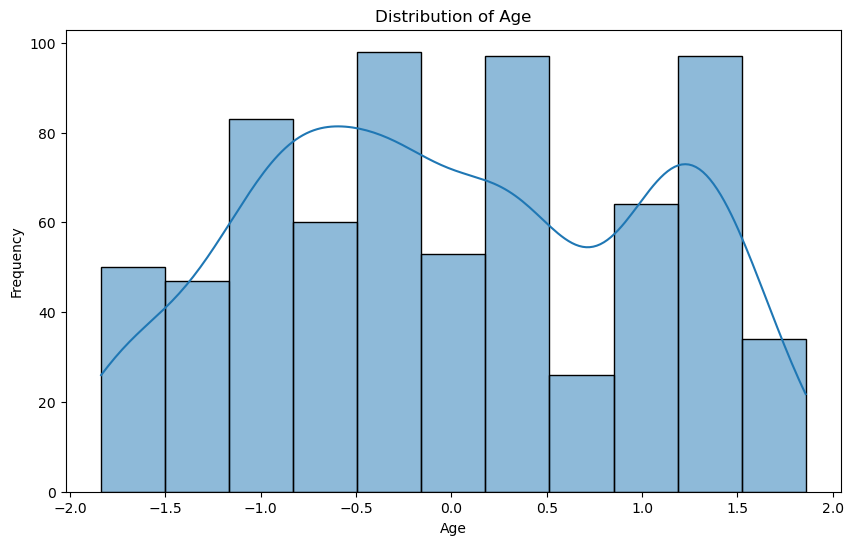

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

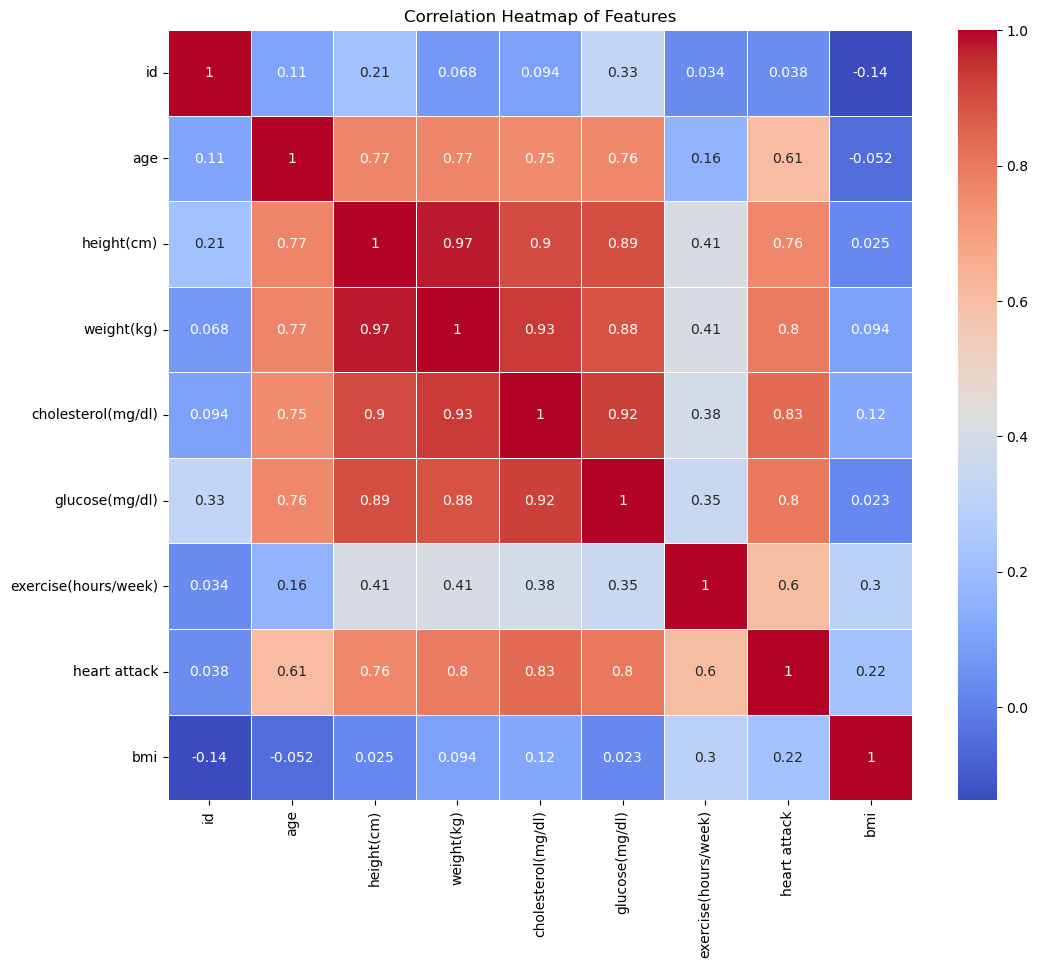

In [64]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

#### Finding Outliers

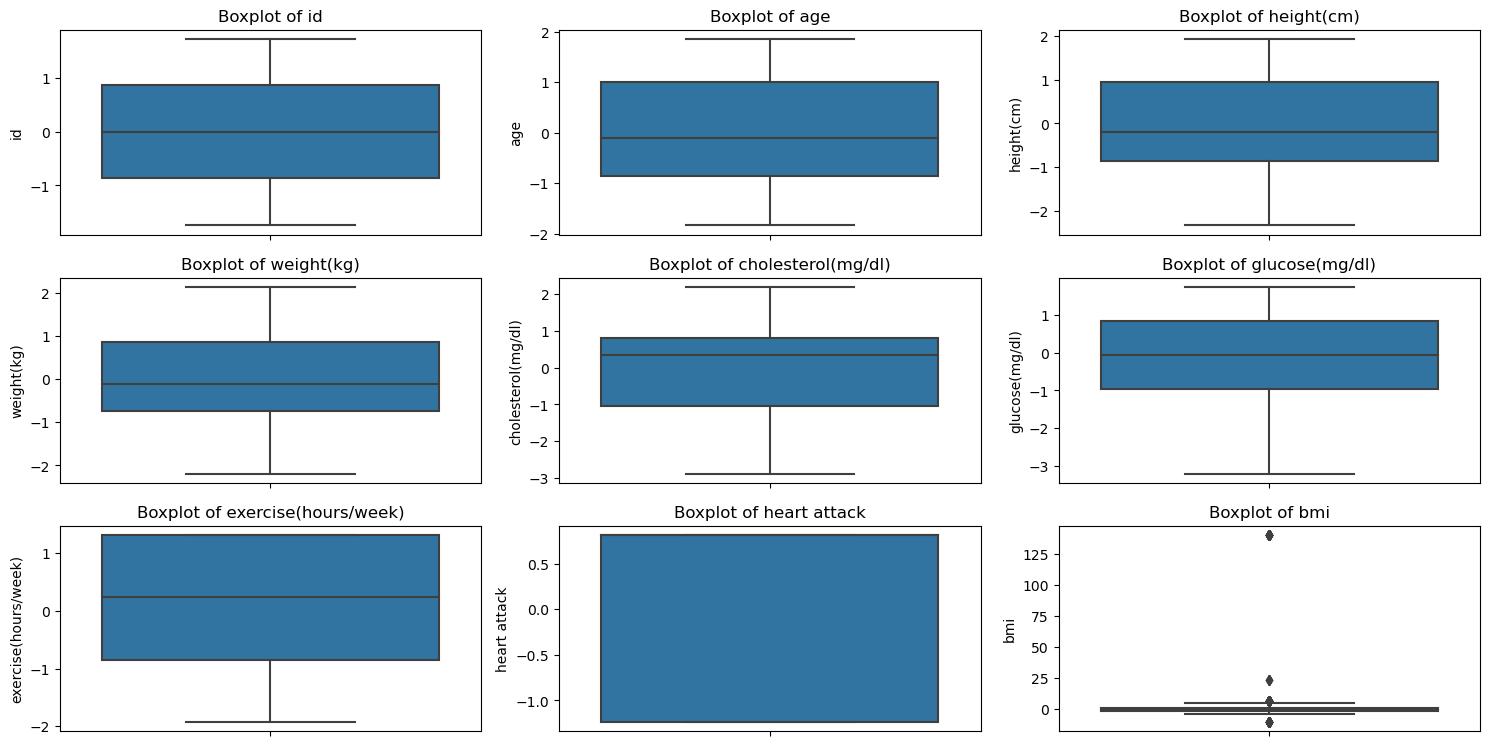

In [67]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [70]:
# Calculate the Z-scores for numerical column
z_scores = df[numeric_cols].apply(zscore)
print(z_scores.head())

# Define a threshold for identifying outliers
threshold = 3

outliers = (z_scores > threshold) | (z_scores < -threshold)
outliers_df = df[outliers.any(axis=1)]

print(outliers_df)

         id       age  height(cm)  weight(kg)  cholesterol(mg/dl)  \
0 -1.748532  0.010769    0.616077    0.688690           -0.576895   
1 -1.743657 -1.220744   -1.838766   -1.712693           -2.423478   
2 -1.738783  1.242282    1.434358    1.489151            1.269689   
3 -1.733908 -0.604987   -1.020485   -0.912232           -1.500186   
4 -1.729033  0.626526   -0.202204   -0.111771            0.346397   

   glucose(mg/dl)  exercise(hours/week)  heart attack       bmi  
0       -0.511364              0.232653     -1.234152 -0.163699  
1       -2.759084             -0.845459     -1.234152 -0.237349  
2        0.612496              1.310766      0.810273 -0.198308  
3       -1.635224              0.232653     -1.234152 -0.249072  
4       -0.061820             -0.845459      0.810273 -0.308020  
           id                name       age  gender  height(cm)  weight(kg)  \
11  -1.694911  Michelle Hernandez -1.590197  Female   -2.329735   -2.192970   
119 -1.168454       Rebecca Smi

In [71]:
df_no_outliers = df[~outliers.any(axis=1)]

print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

Original dataset shape: (709, 14)
Dataset shape after removing outliers: (671, 14)


### Save Cleaned and Preprocessed Dataset

In [72]:
df.to_csv('cleaned_heart_health.csv', index=False)
print("\nPreprocessed dataset saved as 'cleaned_heart_health.csv'")


Preprocessed dataset saved as 'cleaned_heart_health.csv'
